## Import Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math

from sklearn import datasets
from sklearn.metrics import mean_squared_error, r2_score

## Load Dataset

In [2]:
diabetes = datasets.load_diabetes()
print("Input dimension: ", diabetes.data.shape)
print("Input data type: ", type(diabetes.data))
print("Target dimension: ", diabetes.target.shape)
print("Target data type: ", type(diabetes.target))

Input dimension:  (442, 10)
Input data type:  <class 'numpy.ndarray'>
Target dimension:  (442,)
Target data type:  <class 'numpy.ndarray'>


In [3]:
diabetes_X = diabetes.data

diabetes_X_train = diabetes_X[:361]
diabetes_y_train = diabetes.target[:361]

diabetes_X_test = diabetes_X[362:]
diabetes_y_test = diabetes.target[362:]
print(diabetes_X_train.shape, diabetes_y_train.shape, diabetes_X_test.shape, diabetes_y_test.shape)

(361, 10) (361,) (80, 10) (80,)


## Define model

In [4]:
from my_dnn import model, optimizers, loss, metrics
my_model = model.SimpleMlp(layer_dims=[10, 20, 20, 10, 1], output_activation='linear')

## Compile model

In [5]:
my_model.compile(optimizer = optimizers.Adam(learning_rate= 0.005), loss=loss.MSE(), metrics=metrics.RMSE())

## Train model

In [6]:
my_model.fit(diabetes_X_train, diabetes_y_train, validation_data = (diabetes_X_test, diabetes_y_test), epochs=50, batch_size=32, verbose=1)

Epoch 0 Cost: 28940.117534438246 Eval: 169.49680562591246 Val Cost: 29097.732292669534 Val Eval: 170.25107602966963
Epoch 1 Cost: 28668.96584977613 Eval: 168.95649632463594 Val Cost: 28684.996160346484 Val Eval: 168.91385000143197
Epoch 2 Cost: 28047.099448544275 Eval: 167.04463830496974 Val Cost: 27682.253621137566 Val Eval: 166.12563356971185
Epoch 3 Cost: 26550.46067252541 Eval: 162.51082034945247 Val Cost: 25385.7304383514 Val Eval: 158.95212695612472
Epoch 4 Cost: 23579.828957226164 Eval: 152.66411871140303 Val Cost: 21289.549115716763 Val Eval: 145.29069265609138
Epoch 5 Cost: 18282.783739969484 Eval: 134.41157665749643 Val Cost: 14368.488798489165 Val Eval: 118.87861161961519
Epoch 6 Cost: 10823.775519256818 Eval: 103.02309540459518 Val Cost: 6917.275693568709 Val Eval: 82.80157591344157
Epoch 7 Cost: 5366.3528384289675 Eval: 72.48280260174775 Val Cost: 4835.596761391976 Val Eval: 69.53662927136992
Epoch 8 Cost: 4616.578384896304 Eval: 67.62110569189554 Val Cost: 4548.4327516056

## Plot results

In [7]:
history = my_model.get_history()

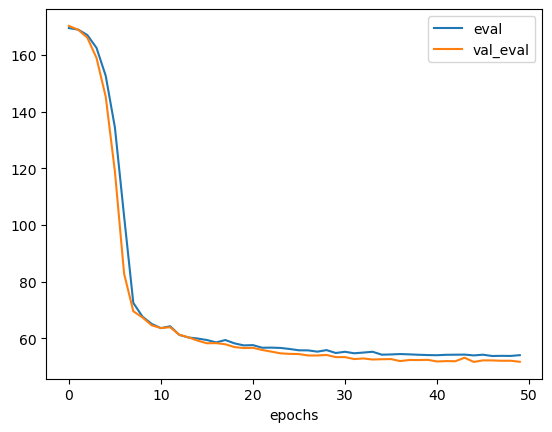

In [8]:
# plt.plot(np.squeeze(my_model.get_costs()), label='cost')
plt.plot(np.squeeze(history['eval']), label='eval')
plt.plot(np.squeeze(history['val_eval']), label='val_eval')
plt.xlabel('epochs')
# plt.title("Learning rate =" + str(learning_rate))
plt.legend()
plt.show()

In [9]:
y_pred_linear = my_model.predict(diabetes_X_test[0:1, :])
print("Gia tri du doan cho mô hình linear regression: ", y_pred_linear)

Gia tri du doan cho mô hình linear regression:  [[221.28058566]]


In [10]:
diabetes_y_pred = my_model.predict(diabetes_X_test)
diabetes_y_test = np.array(diabetes_y_test)
diabetes_y_pred = np.array(diabetes_y_pred).reshape(diabetes_y_test.shape)
pd.DataFrame(data=np.array([diabetes_y_test, diabetes_y_pred,
                            abs(diabetes_y_test - diabetes_y_pred)]).T,
             columns=["Labels", "Predictions", "Dif"])

,Labels,Predictions,Dif
0,321.0,221.280586,99.719414
1,58.0,153.628842,95.628842
2,262.0,153.953917,108.046083
3,206.0,157.369243,48.630757
4,233.0,243.493076,10.493076
...,...,...,...
75,178.0,180.781587,2.781587
76,104.0,104.230277,0.230277
77,132.0,118.162803,13.837197
78,220.0,199.063288,20.936712


In [11]:
math.sqrt(mean_squared_error(diabetes_y_test, diabetes_y_pred))

52.178260414609625